# Regression

In [1]:
import pandas as pd
df = pd.read_csv("kc_house_data.csv")
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# EDA


In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df["house_year"]=2021-df["yr_built"]
# ev yaşları yapım tarihi olarak direk korelasyonda etkisizken , sayı olarak yaş girilmesi daha çok etkisi olur.

In [5]:
df.head()
#cruise anlamı arabanın hız sabitleyicisi olup olmamasıdır.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_year
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,66
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,70
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,88
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,56
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,34


In [6]:
df["zipcode"]=df["zipcode"].astype("category")
#dummy variable yaparken postakodunu fiyat gibi integer bir değer olarak algılamasındansa 
# yazıymış gibi algılamasını sağlarız

In [7]:
df["grade"]


0        7
1        7
2        6
3        7
4        8
        ..
21608    8
21609    8
21610    7
21611    8
21612    7
Name: grade, Length: 21613, dtype: int64

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,house_year
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652,49.994864
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631,29.373411
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,6.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000,24.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000,46.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,70.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,121.000000


In [9]:
abs(df.corr()["price"]).sort_values(ascending = False) 

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
house_year       0.054012
yr_built         0.054012
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

<AxesSubplot:xlabel='sqft_living'>

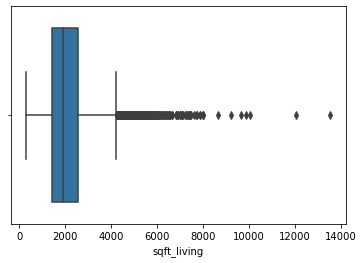

In [10]:
sns.boxplot(df["sqft_living"])

In [11]:
df=df[df["sqft_living"]<4200]


<AxesSubplot:xlabel='grade'>

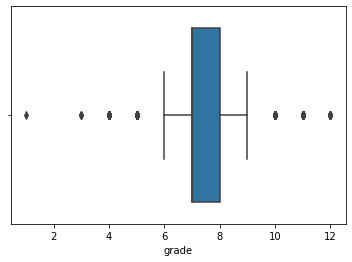

In [12]:
sns.boxplot(df["grade"])

In [13]:
#df=df[df["grade"]<10]
#df=df[df["grade"]>3]
df['grade']=df['grade']/2

<AxesSubplot:xlabel='sqft_above'>

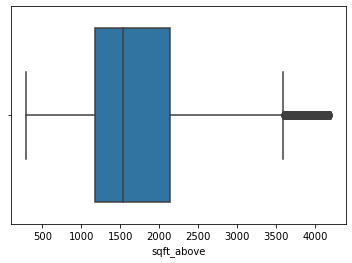

In [14]:
sns.boxplot(df["sqft_above"])

In [15]:
#df=df[df["sqft_above"]<3500]

<AxesSubplot:xlabel='sqft_living15'>

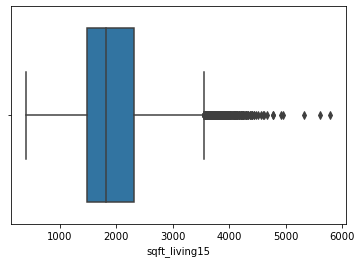

In [16]:
sns.boxplot(df["sqft_living15"])

In [17]:
df =df[df["sqft_living15"]<3750]

<AxesSubplot:xlabel='bathrooms'>

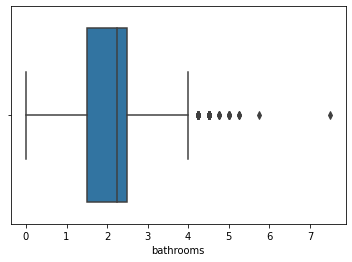

In [18]:
sns.boxplot(df["bathrooms"])

In [19]:
df = df[df["bathrooms"]<4]
df["bathrooms"] = df["bathrooms"]**2


<AxesSubplot:xlabel='sqft_basement'>

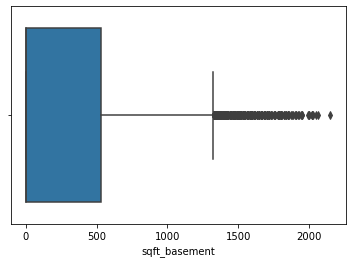

In [20]:
sns.boxplot(df["sqft_basement"])

In [21]:
#df = df[df["sqft_basement"]<1500]

<AxesSubplot:xlabel='bedrooms'>

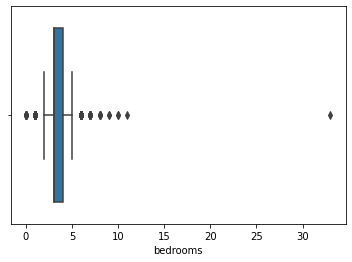

In [22]:
sns.boxplot(df["bedrooms"])

In [23]:
df=df[df["bedrooms"]<7]
df["bedrooms"] = df["bedrooms"]**4

<AxesSubplot:xlabel='lat'>

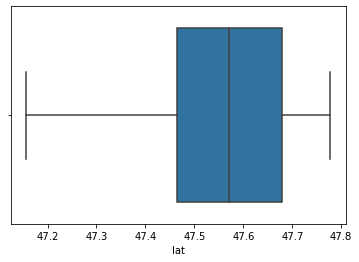

In [24]:
sns.boxplot(df["lat"])

<AxesSubplot:xlabel='floors'>

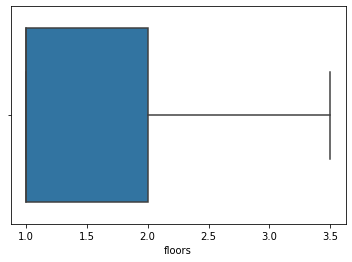

In [25]:
sns.boxplot(df["floors"])

<AxesSubplot:xlabel='house_year'>

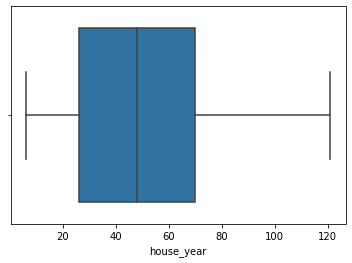

In [26]:
sns.boxplot(df["house_year"])

In [27]:
df.info() #sütun isimleri,dolu kayıt sayısı, veri tipi bunları getirir

#zipcode v

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20626 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             20626 non-null  int64   
 1   date           20626 non-null  object  
 2   price          20626 non-null  float64 
 3   bedrooms       20626 non-null  int64   
 4   bathrooms      20626 non-null  float64 
 5   sqft_living    20626 non-null  int64   
 6   sqft_lot       20626 non-null  int64   
 7   floors         20626 non-null  float64 
 8   waterfront     20626 non-null  int64   
 9   view           20626 non-null  int64   
 10  condition      20626 non-null  int64   
 11  grade          20626 non-null  float64 
 12  sqft_above     20626 non-null  int64   
 13  sqft_basement  20626 non-null  int64   
 14  yr_built       20626 non-null  int64   
 15  yr_renovated   20626 non-null  int64   
 16  zipcode        20626 non-null  category
 17  lat            20626 non-null  

In [28]:
df.shape

(20626, 22)

In [29]:
df.corr() #birbiriri arasındaki bağlantıyı gösterir.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,house_year
id,1.000000,-0.003472,0.007698,0.019561,0.006973,-0.128392,0.026137,-0.001557,0.017273,-0.024304,0.027342,0.008417,-0.001741,0.025031,-0.015429,0.001117,0.021864,0.007745,-0.142239,-0.025031
price,-0.003472,1.000000,0.231543,0.444645,0.612492,0.067165,0.245046,0.194894,0.334166,0.061128,0.622253,0.504180,0.250545,0.014217,0.123917,0.380044,0.001557,0.536703,0.050624,-0.014217
bedrooms,0.007698,0.231543,1.000000,0.376707,0.482859,0.011482,0.094004,-0.017219,0.045524,0.034423,0.219300,0.351820,0.275865,0.060222,0.016116,0.004847,0.064299,0.287978,0.000793,-0.060222
bathrooms,0.019561,0.444645,0.376707,1.000000,0.697181,0.050464,0.495525,0.024236,0.117304,-0.131729,0.602298,0.618341,0.208904,0.507011,0.041630,0.010628,0.203064,0.503801,0.041449,-0.507011
sqft_living,0.006973,0.612492,0.482859,0.697181,1.000000,0.133454,0.335917,0.048962,0.199549,-0.046902,0.707714,0.841868,0.376955,0.328110,0.044567,0.029123,0.246196,0.731205,0.142534,-0.328110
sqft_lot,-0.128392,0.067165,0.011482,0.050464,0.133454,1.000000,-0.021939,0.023850,0.069194,-0.005180,0.076727,0.147405,-0.009856,0.040366,0.010827,-0.094951,0.218399,0.128244,0.695478,-0.040366
floors,0.026137,0.245046,0.094004,0.495525,0.335917,-0.021939,1.000000,0.007061,-0.006137,-0.266219,0.452190,0.532123,-0.301278,0.494429,0.000316,0.041001,0.117575,0.252957,-0.032694,-0.494429
waterfront,-0.001557,0.194894,-0.017219,0.024236,0.048962,0.023850,0.007061,1.000000,0.384971,0.015865,0.042388,0.025353,0.045686,-0.033964,0.081967,-0.024920,-0.050079,0.056699,0.033930,0.033964
view,0.017273,0.334166,0.045524,0.117304,0.199549,0.069194,-0.006137,0.384971,1.000000,0.048420,0.175532,0.082451,0.222035,-0.080562,0.094275,-0.003550,-0.092648,0.222772,0.066859,0.080562
condition,-0.024304,0.061128,0.034423,-0.131729,-0.046902,-0.005180,-0.266219,0.015865,0.048420,1.000000,-0.146324,-0.162670,0.193735,-0.354316,-0.061029,-0.015072,-0.097043,-0.089176,0.001872,0.354316


In [30]:
abs(df.corr()["price"]).sort_values(ascending = False) 

price            1.000000
grade            0.622253
sqft_living      0.612492
sqft_living15    0.536703
sqft_above       0.504180
bathrooms        0.444645
lat              0.380044
view             0.334166
sqft_basement    0.250545
floors           0.245046
bedrooms         0.231543
waterfront       0.194894
yr_renovated     0.123917
sqft_lot         0.067165
condition        0.061128
sqft_lot15       0.050624
yr_built         0.014217
house_year       0.014217
id               0.003472
long             0.001557
Name: price, dtype: float64

In [31]:
df["basement"]=np.where(df["sqft_basement"]>0, 1 , 0)
df["renovated"]=np.where(df["yr_renovated"]>0, 1 , 0)
#sqft_basement anlamı kaç metrekare bodrum oldığunu söyler. Bodrumun kaç metrekare olduğundan çok olup olmaması önemli o yüzden e
# eğer metrekaresi 0 dan büyükse yani varsa 1 yoksa 0 yaptık.

#Aynı şekilde renovated evin yenilenmesidir . Ne zaman yenilendiğinden çok yenilenip yenilenmemesi bizim için önemlidir.

In [32]:
outliers = df.quantile(.97) #burada outlier verileri belirleyen bir fonksiyon kullandık
df = df[(df['price']<outliers['price'])]
df = df[(df['bedrooms']<outliers['bedrooms'])]
df = df[(df['sqft_living']<outliers['sqft_living'])]

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Daha Gelişmiş bir algoritma

In [34]:
x = df[["sqft_living","grade","sqft_above","sqft_living15","bathrooms","view","basement",
        "bedrooms","lat","floors","zipcode","renovated","house_year"]]
y = df[["price"]]


In [35]:
x = pd.get_dummies(x , drop_first = True)
x.head()
#dummy variable yaptık bu sayede sadece sayılarla uğraşacağız(2.derste işlendi detayı orada var)


,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,basement,bedrooms,lat,floors,renovated,house_year,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1180,3.5,1180,1340,1.0000,0,0,81,47.5112,1.0,0,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2570,3.5,2170,1690,5.0625,0,1,81,47.7210,2.0,1,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,770,3.0,770,2720,1.0000,0,0,16,47.7379,1.0,0,88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1960,3.5,1050,1360,9.0000,0,1,256,47.5208,1.0,0,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1680,4.0,1680,1800,4.0000,0,0,81,47.6168,1.0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state= 42)
lr = LinearRegression()
regmodel = lr.fit(x_train , y_train) # fit diyerek veriden öğrenme işlemi gerçekleşiyor
y_pretest = regmodel.predict(x_test) 
y_pretest


array([[413654.34071615],
       [377499.58055336],
       [688460.2202885 ],
       ...,
       [564454.8790103 ],
       [576712.91126778],
       [386824.16746682]])

In [37]:
x_train.shape , y_test.shape

((14619, 81), (3655, 1))

In [38]:
from sklearn.metrics import mean_squared_error , r2_score 
(mean_squared_error(y_test, y_pretest))**0.5 
#242 araba içinde fiyat tahmin etmedeki toplam hata(gerçek değer ile tahmin arasındaki fark) 1715 $'dır.
#karesini alıp karekökünü alarak eksi çıkanları da hesaba dahil etmiş oluruz.

83850.6572073708

In [39]:
r2_score(y_test,y_pretest)
#r2 %80 ve üzeri ise modelimiz başarılıdır burada %97

0.8098986238128518

# Ridge ve Lasso

In [40]:
from sklearn.linear_model import Ridge,Lasso

In [41]:
R=Ridge()
R.fit(x_train , y_train)
y_pred_ridge = R.predict(x_test)
#fit ve predict yine aynı

In [42]:
(mean_squared_error(y_test, y_pred_ridge))**0.5 

84011.05676461817

In [43]:
r2_score(y_test,y_pred_ridge)
#%96 oranında başarı demek ki oranımız yüksek

0.8091706309233833

Şimdi lasso 'yu çalıştıracaz

In [44]:
L=Lasso()
L.fit(x_train , y_train)
y_pred_lasso = L.predict(x_test)

In [45]:
(mean_squared_error(y_test, y_pred_lasso))**0.5 

83847.0553017537

In [46]:
r2_score(y_test,y_pred_ridge)
#ridge ile aynı template'i kullanır

0.8091706309233833

### ElasticNet


In [47]:
from sklearn.linear_model import ElasticNet
E= ElasticNet(l1_ratio = 0.2)

#l1= lasso
#l2=ridge
#lassonun % 80 oranında çalılşmasını sağladık

#Elasticnet dedğimiz şey aslında lsasso ve ridge karışımı bir şey olur

In [48]:
E.fit(x_train , y_train)
y_pred_elastic = E.predict(x_test)

In [49]:
(mean_squared_error(y_test, y_pred_elastic))**0.5 

141810.6049634258

In [50]:
r2_score(y_test,y_pred_elastic)

0.45626193352995825